In [1]:
import scipy.signal
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

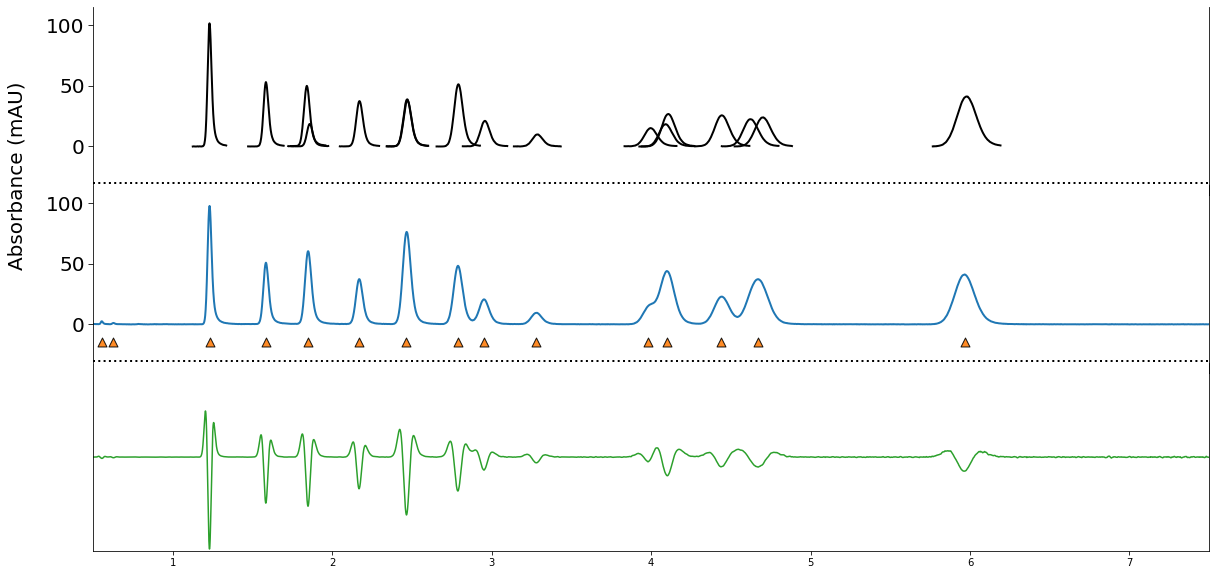

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [2, 2, 2]})

chromatogram_path = '../input/ISO40_mixed/MIX_ISO40.CSV'
peaks_path = glob.glob('../input/ISO40_mixed/[XVI0-9]*.CSV')

data = pd.read_csv(chromatogram_path, header=None, sep='\t', encoding='utf-16')
chromatogram = data.iloc[:, 1].values
time = data.iloc[:, 0].values

# CHROMATOGRAM
axes[1].plot(time, chromatogram, c='C0', linestyle='-', linewidth=2, label='Original\nchromatogram')

# INDIVIDUAL PEAKS
for j, path in enumerate(peaks_path):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    peak = data.iloc[:, 1]
    time_ = data.iloc[:, 0]
    i = np.argmax(peak)
    shift = int(200 * (1 + (i / len(time)))**2)
    axes[0].plot(time[i-shift: i+shift], peak[i-shift: i+shift], c='black', linewidth=2, 
                 label='Individual peaks' if j == 0 else None)

    
# DERIVATIVE, PEAK DETECTION 
deriv = scipy.signal.savgol_filter(chromatogram, window_length=101, polyorder=2, deriv=2)
enhance = np.linspace(0., 20, len(deriv))
axes[2].plot(time, deriv * enhance, c='C2', label='Second order derivative')

predicted_locs = scipy.signal.find_peaks(-deriv, height=0.0005, width=10)[0]
for i, loc in enumerate(predicted_locs):
    axes[1].scatter(time[loc], -15, marker='^', s=80, alpha=0.9, edgecolors='black', c=f'C1', label="Predicted\nlocations" if i == 0 else None)

    
    
# MODIFY PLOTS
axes[0].set_xlim(0.5, 7.5)
axes[1].set_xlim(0.5, 7.5)
axes[2].set_xlim(0.5, 7.5)

axes[0].set_ylim(-40, 115)
axes[1].set_ylim(-40, 115)
axes[2].set_ylim(-0.15, 0.15)

axes[0].set_yticks([0, 50, 100])
axes[1].set_yticks([0, 50, 100])
axes[2].set_yticks([])

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)

axes[0].axhline(-30, color='black', linestyle=':', linewidth=2)
axes[1].axhline(-30, color='black', linestyle=':', linewidth=2)

axes[0].tick_params(
    axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=20, length=5)

axes[1].tick_params(
    axis='both', which='both',labelsize=20, length=5)

axes[1].set_xlabel('Time (min)', fontsize=20)
axes[0].set_ylabel('Absorbance (mAU)', fontsize=20)
axes[0].yaxis.set_label_coords(-0.06, 0.1)

# axes[0].legend(fontsize=16, frameon=False)
# axes[1].legend(fontsize=16, frameon=False)
# axes[2].legend(fontsize=16, frameon=False)

plt.subplots_adjust(hspace=-0.05)

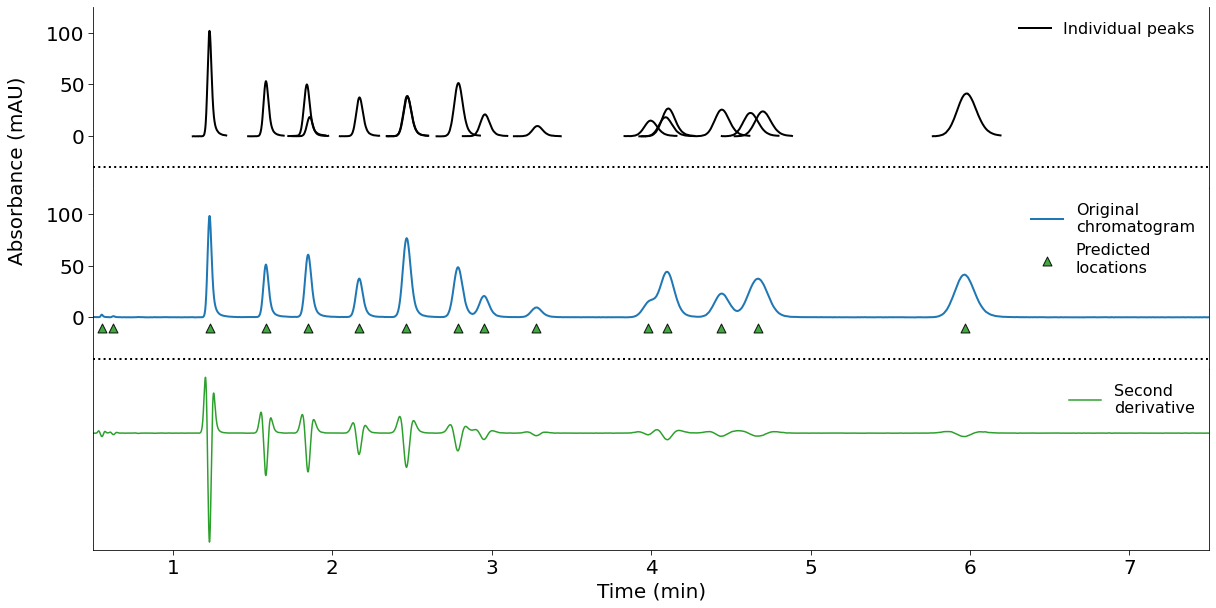

In [137]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [2, 2, 2]})

chromatogram_path = '../input/ISO40_mixed/MIX_ISO40.CSV'
peaks_path = glob.glob('../input/ISO40_mixed/[XVIL0-9]*.CSV*')

data = pd.read_csv(chromatogram_path, header=None, sep='\t', encoding='utf-16')
chromatogram = data.iloc[:, 1].values
time = data.iloc[:, 0].values

# CHROMATOGRAM
axes[1].plot(time, chromatogram, c='C0', linestyle='-', linewidth=2, label='Original\nchromatogram')

# INDIVIDUAL PEAKS
for j, path in enumerate(peaks_path):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    t = data.iloc[:, 0]
    signal = data.iloc[:, 1]
    i = np.argmax(signal)
    extra = 1 + (i / len(t))
    shift = int(200 * extra**2)
    axes[0].plot(t[i-shift: i+shift], signal[i-shift: i+shift], c=f'black', 
                 linestyle='-', linewidth=2, 
                 label='Individual peaks' if j == 0 else None)

    
# DERIVATIVE, PEAK DETECTION 
deriv = scipy.signal.savgol_filter(chromatogram, window_length=101, polyorder=2, deriv=2)
enhance = np.linspace(0., 20, len(deriv))
axes[2].plot(time, deriv, c='C2', label='Second\nderivative')

predicted_locs = scipy.signal.find_peaks(-deriv, height=0.0005, 
                                         width=chromatogram.shape[0] / 500, 
                                         distance=chromatogram.shape[0] / 256)[0]
for i, loc in enumerate(predicted_locs):
    axes[1].scatter(time[loc], -10, marker='^', s=80, alpha=0.9, edgecolors='black', c=f'C2', label="Predicted\nlocations" if i == 0 else None)

    
# MODIFY PLOTS
axes[0].set_xlim(0.05 * 10, 0.75 * 10)
axes[1].set_xlim(0.05 * 10, 0.75 * 10)
axes[2].set_xlim(0.05 * 10, 0.75 * 10)

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].spines['top'].set_visible(False)

axes[0].set_ylim(-50, 125)
axes[1].set_ylim(-50, 125)
axes[0].axhline(-30, color='black', linestyle=':', linewidth=2)
axes[1].axhline(-40, color='black', linestyle=':', linewidth=2)
axes[0].set_yticks([0, 50, 100])
axes[1].set_yticks([0, 50, 100])

axes[0].set_yticks([0, 50, 100])
axes[1].set_yticks([0, 50, 100])
axes[2].set_yticks([])

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

axes[0].tick_params(
    axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=20, length=5)
axes[1].tick_params(
    axis='both', which='both',labelsize=20, length=5)
axes[2].tick_params(
    axis='both', which='both',labelsize=20, length=5)

axes[2].set_xlabel('Time (min)', fontsize=20)
axes[0].set_ylabel('Absorbance (mAU)', fontsize=20)
axes[0].yaxis.set_label_coords(-0.06, 0.1)

axes[2].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[1].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[0].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
plt.subplots_adjust(hspace=-0.0)

plt.savefig('Figure_4_SG.png', dpi=200)

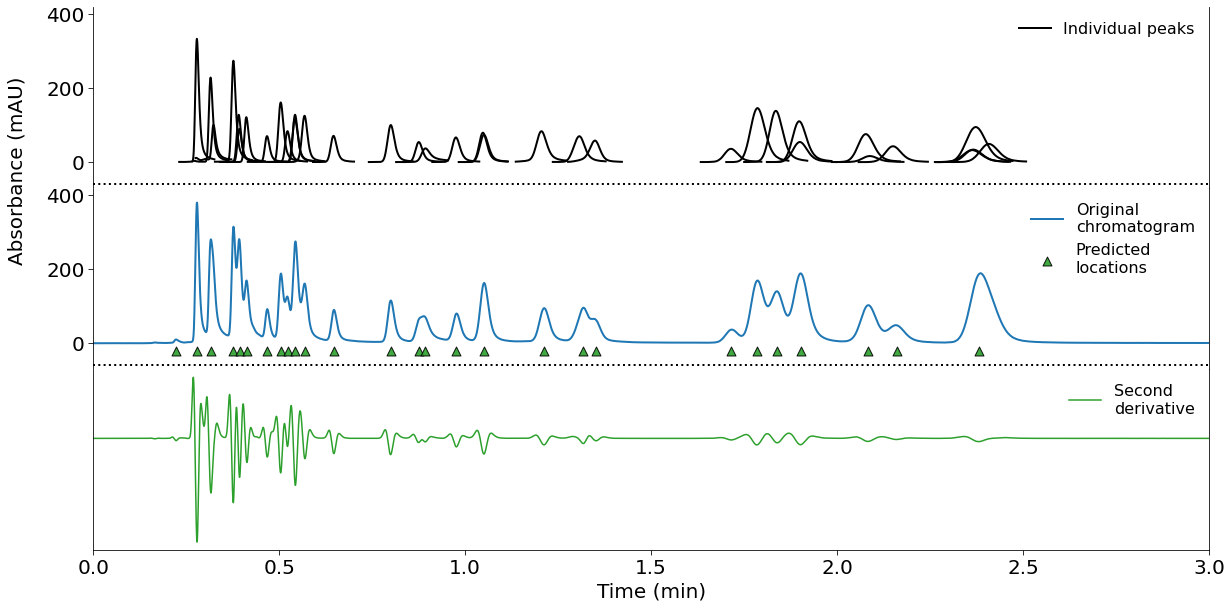

In [136]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [2, 2, 2]})

chromatogram_path = '../input/ISO30B_mixed/MIX_ISO30B.CSV'
peaks_path = glob.glob('../input/ISO30B_mixed/[XVIL0-9]*.CSV*')

data = pd.read_csv(chromatogram_path, header=None, sep='\t', encoding='utf-16')
chromatogram = data.iloc[:, 1].values
time = data.iloc[:, 0].values

# CHROMATOGRAM
axes[1].plot(time, chromatogram, c='C0', linestyle='-', linewidth=2, label='Original\nchromatogram')

# INDIVIDUAL PEAKS
for j, path in enumerate(peaks_path):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    t = data.iloc[:, 0]
    signal = data.iloc[:, 1]
    i = np.argmax(signal)
    extra = 1 + (i / len(t))
    shift = int(100 * extra**1.5)
    axes[0].plot(t[i-shift: i+shift], signal[i-shift: i+shift], c=f'black', 
                 linestyle='-', linewidth=2, 
                 label='Individual peaks' if j == 0 else None)

    
# DERIVATIVE, PEAK DETECTION 
deriv = scipy.signal.savgol_filter(chromatogram, window_length=45, polyorder=2, deriv=2)
enhance = np.linspace(0., 20, len(deriv))
axes[2].plot(time, deriv, c='C2', label='Second\nderivative')

predicted_locs = scipy.signal.find_peaks(-deriv, height=0.01, 
                                         width=chromatogram.shape[0] / 500, 
                                         distance=chromatogram.shape[0] / 256)[0]
for i, loc in enumerate(predicted_locs):
    axes[1].scatter(time[loc], -20, marker='^', s=80, alpha=0.9, edgecolors='black', c=f'C2', label="Predicted\nlocations" if i == 0 else None)

    
# MODIFY PLOTS
axes[0].set_xlim(0, 3)
axes[1].set_xlim(0, 3)
axes[2].set_xlim(0, 3)

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].spines['top'].set_visible(False)

axes[0].set_ylim(-70, 420)
axes[1].set_ylim(-70, 420)
axes[0].axhline(-60, color='black', linestyle=':', linewidth=2)
axes[1].axhline(-60, color='black', linestyle=':', linewidth=2)
axes[0].set_yticks([0, 200, 400])
axes[1].set_yticks([0, 200, 400])

axes[0].set_yticks([0, 200, 400])
axes[1].set_yticks([0, 200, 400])
axes[2].set_yticks([])

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[2].spines['top'].set_visible(False)


axes[0].tick_params(
    axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=20, length=5)
axes[1].tick_params(
    axis='both', which='both',labelsize=20, length=5)
axes[2].tick_params(
    axis='both', which='both',labelsize=20, length=5)

axes[2].set_xlabel('Time (min)', fontsize=20)
axes[0].set_ylabel('Absorbance (mAU)', fontsize=20)
axes[0].yaxis.set_label_coords(-0.06, 0.1)

axes[2].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[1].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[0].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
plt.subplots_adjust(hspace=-0.0)

plt.savefig('Figure_6_SG.png', dpi=200)

In [110]:
data

,0,1
0,0.000200,-0.091590
1,0.000617,-0.090897
2,0.001033,-0.088021
3,0.001450,-0.086136
4,0.001867,-0.087157
...,...,...
7196,2.998533,-0.182569
7197,2.998950,-0.185899
7198,2.999367,-0.182554
7199,2.999783,-0.174426


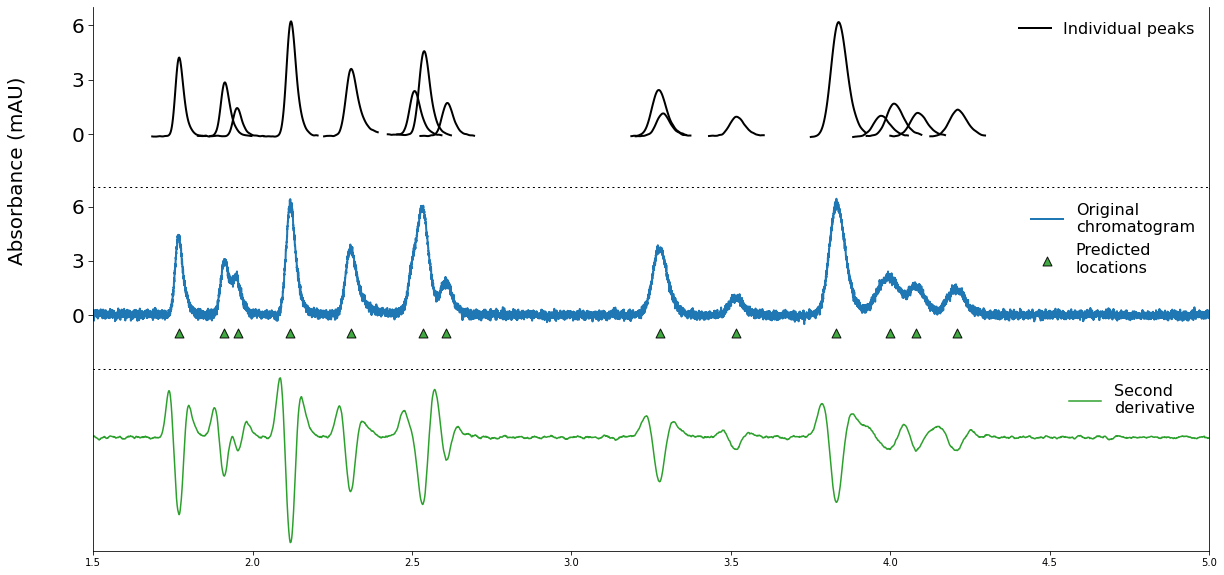

In [140]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [2, 2, 2]})

chromatogram_path = '../input/chrom_1/ISO_ALL_F160.CSV'
peaks_path = glob.glob('../input/chrom_1/ISO_[0-9]*')

data = pd.read_csv(chromatogram_path, header=None, sep='\t', encoding='utf-16')
chromatogram = data.iloc[:, 1].values
time = data.iloc[:, 0].values

# CHROMATOGRAM
axes[1].plot(time, chromatogram, c='C0', linestyle='-', linewidth=2, label='Original\nchromatogram')

# INDIVIDUAL PEAKS
for j, path in enumerate(peaks_path):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    peak = data.iloc[:, 1]
    time_ = data.iloc[:, 0]
    i = np.argmax(peak)
    shift = int(50 * (1 + (i / len(time)))**2)
    axes[0].plot(time_[i-shift: i+shift], peak[i-shift: i+shift], c='black', linewidth=2, 
                 label='Individual peaks' if j == 0 else None)

    
# DERIVATIVE, PEAK DETECTION 
deriv = scipy.signal.savgol_filter(chromatogram, window_length=601, polyorder=2, deriv=2)
enhance = np.linspace(0., 20, len(deriv))
axes[2].plot(time, deriv, c='C2', label='Second\nderivative')

predicted_locs = scipy.signal.find_peaks(-deriv, height=0.00001, distance=chromatogram.shape[0] / 256)[0]
for i, loc in enumerate(predicted_locs):
    axes[1].scatter(time[loc], -1, marker='^', s=80, alpha=0.9, edgecolors='black', c=f'C2', label="Predicted\nlocations" if i == 0 else None)

    
# MODIFY PLOTS
axes[0].set_xlim(1.5, 5.)
axes[1].set_xlim(1.5, 5.)
axes[2].set_xlim(1.5, 5.)

axes[0].set_ylim(-3, 7)
axes[1].set_ylim(-3, 7)
#axes[2].set_ylim(-0.15, 0.15)

axes[0].set_yticks([0, 3, 6])
axes[1].set_yticks([0, 3, 6])
axes[2].set_yticks([])

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

axes[0].axhline(-3, color='black', linestyle=':', linewidth=2)
axes[1].axhline(-3, color='black', linestyle=':', linewidth=2)

axes[0].tick_params(
    axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=20, length=5)

axes[1].tick_params(
    axis='both', which='both',labelsize=20, length=5)

axes[1].set_xlabel('Time (min)', fontsize=20)
axes[0].set_ylabel('Absorbance (mAU)', fontsize=20)
axes[0].yaxis.set_label_coords(-0.06, 0.1)

axes[2].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[1].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
axes[0].legend(bbox_to_anchor=(0, 0, 1, 1), ncol=1, columnspacing=0, fontsize=16, frameon=False)
plt.subplots_adjust(hspace=-0.0)

plt.savefig('Figure_5_SG.png', dpi=200)

375.01953125

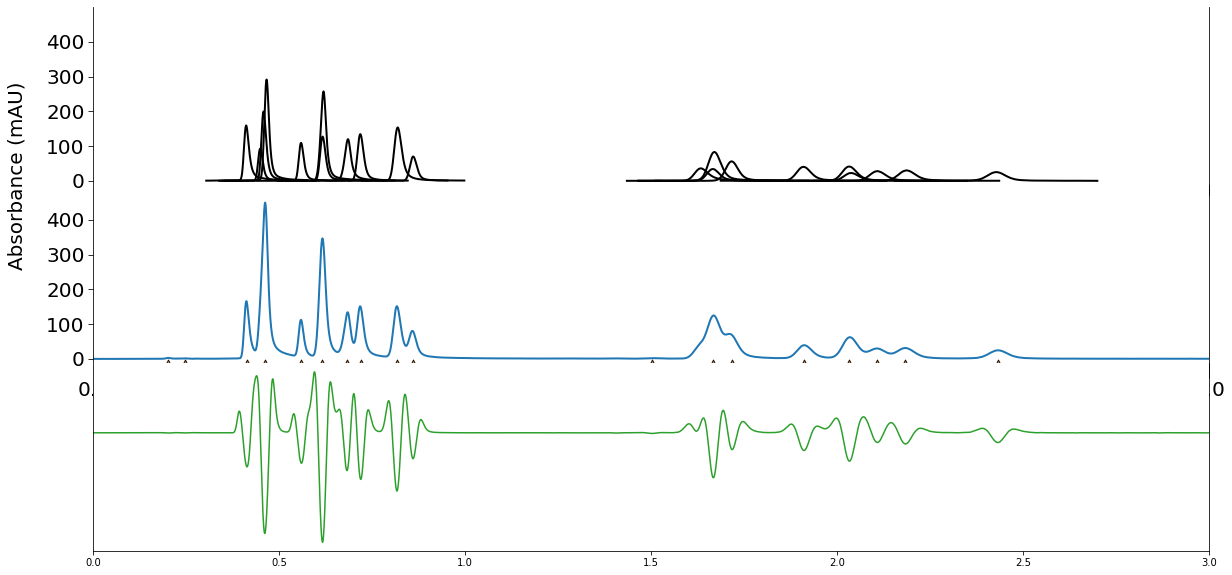

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [2, 2, 2]})

chromatogram_path = '../input/ISO10_mixed/MIX_ISO10.CSV'
peaks_path = glob.glob('../input/ISO10_mixed/[XVIL0-9]*.CSV')

data = pd.read_csv(chromatogram_path, header=None, sep='\t', encoding='utf-16')
chromatogram = data.iloc[:, 1].values
time = data.iloc[:, 0].values

# CHROMATOGRAM
axes[1].plot(time, chromatogram, c='C0', linestyle='-', linewidth=2, label='Original\nchromatogram')

# INDIVIDUAL PEAKS
for j, path in enumerate(peaks_path):
    data = pd.read_csv(path, header=None, sep='\t', encoding='utf-16')
    peak = data.iloc[:, 1]
    time_ = data.iloc[:, 0]
    i = np.argmax(peak)
    shift = int(200 * (1 + (i / len(time)))**2)
    axes[0].plot(time[i-shift: i+shift], peak[i-shift: i+shift], c='black', linewidth=2, 
                 label='Individual peaks' if j == 0 else None)

    
# DERIVATIVE, PEAK DETECTION 
deriv = scipy.signal.savgol_filter(chromatogram, window_length=101, polyorder=2, deriv=2)
enhance = np.linspace(0., 20, len(deriv))
axes[2].plot(time, deriv * enhance, c='C2', label='Second order derivative')

predicted_locs = scipy.signal.find_peaks(-deriv, height=0.0005, width=10)[0]
for i, loc in enumerate(predicted_locs):
    axes[1].scatter(time[loc], -15, marker='^', s=80, alpha=0.9, edgecolors='black', c=f'C1', label="Predicted\nlocations" if i == 0 else None)

    
    
# MODIFY PLOTS
axes[0].set_xlim(0., 3.)
axes[1].set_xlim(0., 3.)
axes[2].set_xlim(0., 3.)

axes[0].set_ylim(-40, 500)
axes[1].set_ylim(-40, 500)
# axes[2].set_ylim(-0.15, 0.15)

axes[0].set_yticks([0, 100, 200, 300, 400])
axes[1].set_yticks([0, 100, 200, 300, 400])
axes[2].set_yticks([])

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)

axes[0].axhline(-30, color='black', linestyle=':', linewidth=2)
axes[1].axhline(-30, color='black', linestyle=':', linewidth=2)

axes[0].tick_params(
    axis='y', which='both', bottom=False, top=False, labelbottom=False, labelsize=20, length=5)

axes[1].tick_params(
    axis='both', which='both',labelsize=20, length=5)

axes[1].set_xlabel('Time (min)', fontsize=20)
axes[0].set_ylabel('Absorbance (mAU)', fontsize=20)
axes[0].yaxis.set_label_coords(-0.06, 0.1)

# axes[0].legend(fontsize=16, frameon=False)
# axes[1].legend(fontsize=16, frameon=False)
# axes[2].legend(fontsize=16, frameon=False)

plt.subplots_adjust(hspace=-0.05)